# Percentile plots
9th December 2024

In [3]:
import sys
sys.path.append('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm')

In [4]:
import numpy as np
import xarray as xr
import glob
import seaborn as sns

import scipy as sp
import sys
sys.path.append(
    '/Users/kenzatazi/Documents/CDT/Code/')
from load import aphrodite, data_dir
import pandas as pd
import cartopy.crs as ccrs
from cartopy.io import shapereader
import matplotlib.pyplot as plt
import cartopy.feature as cf
import matplotlib.ticker as mticker
import utils.areal_plots as aplot
import utils.prob_plots as pplot
from models import moe
from matplotlib.patches import Patch
from shapely.geometry import LinearRing
import matplotlib.patheffects as pe


In [5]:
def regional_rectangle(lonmin, lonmax, latmin, latmax, nvert=100):
    """ Return Polygon object to create regional rectangle on maps."""
    lons = np.r_[
        np.linspace(lonmin, lonmin, nvert),
        np.linspace(lonmin, lonmax, nvert),
        np.linspace(lonmax, lonmax, nvert),
    ].tolist()

    lats = np.r_[
        np.linspace(latmin, latmax, nvert),
        np.linspace(latmax, latmax, nvert),
        np.linspace(latmax, latmin, nvert),
    ].tolist()

    pgon = LinearRing(list(zip(lons, lats)))

    return pgon

In [6]:
hma1 = regional_rectangle(71, 79, 32, 39)
hma2 = regional_rectangle(76, 93, 27, 32)
hma3 = regional_rectangle(93, 103, 28, 36)
region_dict2 = {'HMA1': [71.5, 37.5], 'HMA2': [76.5, 30.5], 'HMA3': [93.5, 34.5],}
proj = ccrs.PlateCarree()

In [7]:
aphro_ds= aphrodite.collect_APHRO('hma', minyear='1976', maxyear='2005-12-31')
aphro_ds= aphro_ds.groupby('time.month').median('time',)
#aphro_ds.isel(month=10).tp.plot()

In [8]:
# HKH region
hkh_region_path = data_dir + "Shapefiles/hkh/outline.shp"
hkh_region_shape = shapereader.Reader(hkh_region_path)
hkh_region_globe = ccrs.Globe(semimajor_axis=6377276.345, inverse_flattening=300.8017)
hkh_region = ccrs.PlateCarree()

## Historical plots

In [31]:
hist_df = pd.read_csv("../../data/moe_outputs/moe_alpha_historical_1976_2005_ref_1951_2005.csv", index_col=0)

In [32]:
hist_ds = hist_df.set_index(['month', 'lat', 'lon']).to_xarray()
hist_ds['diffs'] =  hist_ds['moe_median'] - hist_ds['ew_median'] #- 1) #*100
hist_ds['aphro_err'] = hist_ds['moe_median'] - (aphro_ds['tp'])
hist_ds['aphro_ew_err'] = hist_ds['ew_median'] - (aphro_ds['tp'])
hist_ds['aphro_diffs'] = (hist_ds['moe_median'] / (aphro_ds['tp']+0.001) -1) #*100
hist_ds['aphro_ew_diffs'] = (hist_ds['ew_median'] / (aphro_ds['tp']+0.001) - 1)#*100

In [19]:
hist_ds

<xarray.Dataset>
Dimensions:         (month: 12, lat: 80, lon: 180)
Coordinates:
  * month           (month) float64 1.0 2.0 3.0 4.0 5.0 ... 9.0 10.0 11.0 12.0
  * lat             (lat) float64 20.12 20.38 20.62 20.88 ... 39.38 39.62 39.88
  * lon             (lon) float64 60.12 60.38 60.62 60.88 ... 104.4 104.6 104.9
Data variables:
    moe_median      (month, lat, lon) float64 nan nan nan ... 0.0208 0.01943
    moe_p95         (month, lat, lon) float64 nan nan nan ... 0.1767 0.1997
    moe_p5          (month, lat, lon) float64 nan nan nan ... 0.001277 0.001223
    ew_p5           (month, lat, lon) float64 0.0002418 0.0001919 ... 0.001836
    ew_p95          (month, lat, lon) float64 1.372 1.352 ... 0.5182 0.5316
    ew_median       (month, lat, lon) float64 0.08296 0.07813 ... 0.1151 0.1114
    diffs           (month, lat, lon) float64 nan nan nan ... -0.09431 -0.09196
    aphro_err       (month, lat, lon) float64 nan nan nan ... -0.000745 -0.0028
    aphro_ew_err    (month, lat, lon) float64 nan nan nan ... 0.09357 0.08916
    aphro_diffs     (month, lat, lon) float64 nan nan nan ... 3.178 -7.74 -16.36
    aphro_ew_diffs  (month, lat, lon) float64 nan nan nan ... 483.9 410.6 379.5

In [20]:
aphro_ds

<xarray.Dataset>
Dimensions:  (lon: 200, lat: 88, month: 12)
Coordinates:
  * lon      (lon) float64 60.12 60.38 60.62 60.88 ... 109.1 109.4 109.6 109.9
  * lat      (lat) float64 20.12 20.38 20.62 20.88 ... 41.12 41.38 41.62 41.88
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    tp       (month, lat, lon) float32 nan nan nan ... 0.06205 0.06689 0.0684
Attributes:
    plot_legend:  APHRODITE

In [33]:
hist_moe = aplot.seasonal_means(hist_ds['moe_median'], 'moe_median')

In [34]:
hist_diffs = aplot.seasonal_means(hist_ds.diffs, 'diffs')
aphro_err = aplot.seasonal_means(hist_ds.aphro_err, 'aphro_err')
ew_aphro_err = aplot.seasonal_means(hist_ds.aphro_ew_err, 'aphro_ew_err')
aphro_diffs = aplot.seasonal_means(hist_ds.aphro_diffs, 'aphro_diffs')
ew_aphro_diffs = aplot.seasonal_means(hist_ds.aphro_ew_diffs, 'aphro_ew_diffs')

diff_diffs = aphro_diffs - ew_aphro_diffs

In [35]:
aphro_seasonal = aplot.seasonal_means(aphro_ds.tp, 'tp')

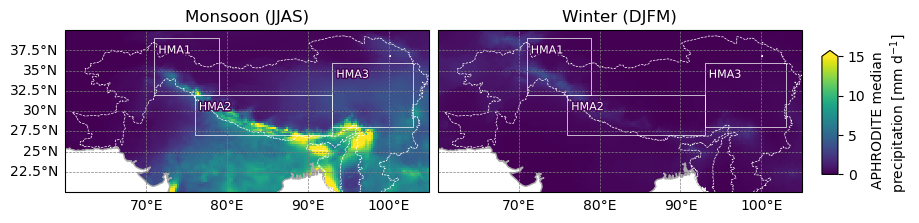

In [127]:
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(1, 2, figsize=(8, 2.5), subplot_kw={"projection": proj},layout='constrained')

# Map
ocean_50m = cf.NaturalEarthFeature("physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

fig0  = aphro_seasonal.isel(t=1).plot(x="lon", y="lat", ax=ax[0], vmin=0, vmax=15,
                                   add_colorbar=False, linewidth=0, zorder=-10)
ax[0].set_title("Monsoon (JJAS)")

fig1  = aphro_seasonal.isel(t=2).plot(x="lon", y="lat", ax=ax[1], vmin=0, vmax=15,
                                   add_colorbar=False, linewidth=0, zorder=-10)
cax = plt.axes([ax[1].get_position().x1+0.12, 
                ax[1].get_position().y0, 
                0.02, 
                ax[1].get_position().height])
plt.colorbar(fig0, cax=cax, label='APHRODITE median  \n precipitation [mm d$^{-1}$]', extend='max')
ax[1].set_title("Winter (DJFM)")

for i in range(2):
    gl = ax[i].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    if i % 2 != 0:
       gl.left_labels = False
    ax[i].add_feature(ocean_50m, zorder=-9)
    ax[i].set_extent([60, 105, 20, 40], crs=proj)
    # change y tick values
    gl.ylocator = mticker.FixedLocator([22.5, 25, 27.5, 30, 32.5, 35, 37.5])

    for region, coord in region_dict2.items():
        ax[i].text(coord[0], coord[1], region, fontsize=8, color='white', ha='left', va='center', zorder=10, 
        path_effects=[pe.withStroke(linewidth=2, foreground="#440154")]) 
    ax[i].add_geometries([hma1, hma2, hma3], proj, edgecolor="white",
        facecolor="None", linestyle='-', linewidth=0.5)
    # HKH boundaries
    for rec in hkh_region_shape.records():
        ax[i].add_geometries(
            [rec.geometry],
            hkh_region,
            edgecolor="white",
            facecolor="None",
            linestyle='--',
            linewidth=0.5,
            zorder=-8)

# Rasterize negative zorder
for a in ax.flat:
    a.set_rasterization_zorder(0) 
        
plt.savefig("aphrodite_1976_2005.pdf", dpi=300, bbox_inches='tight')

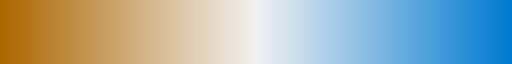

In [37]:
# color map that only goes to 0.75 of color range
cmap = sns.diverging_palette(40, 250, s=100, as_cmap=True)
sns.diverging_palette(40, 250, s=100, as_cmap=True)

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_49767/2322877928.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("moe_historical.pdf", dpi=300, bbox_inches='tight')


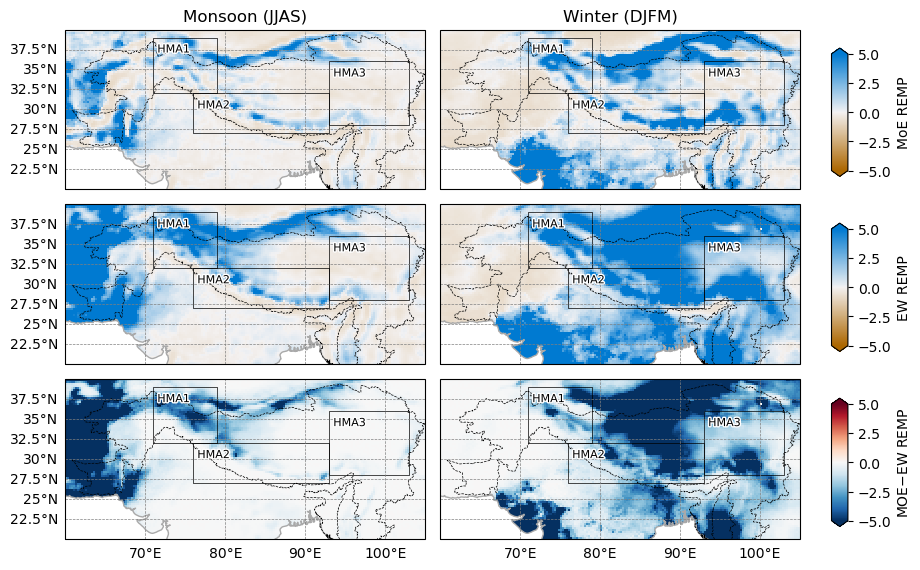

In [131]:
proj = ccrs.PlateCarree()

fig, ax = plt.subplots(3, 2, figsize=(8.2, 6), subplot_kw={"projection": proj},layout='tight' )

# Map
ocean_50m = cf.NaturalEarthFeature("physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

fig0  = aphro_diffs.isel(t=1).plot(x="lon", y="lat", ax=ax[0, 0], cmap=cmap, center=0, vmax=5,
                                   add_colorbar=False, linewidth=0, zorder=-10)
ax[0, 0].set_title("Monsoon (JJAS)")

fig1  = aphro_diffs.isel(t=2).plot(x="lon", y="lat", ax=ax[0, 1], cmap=cmap, center=0, vmax=5,
                                   add_colorbar=False, linewidth=0, zorder=-10)
cax = plt.axes([ax[0,1].get_position().x1+0.12, 
                ax[0,1].get_position().y0+0.02, 
                0.02, 
                ax[0,1].get_position().height])
plt.colorbar(fig0, cax=cax, label='MoE REMP', extend='both')
ax[0, 1].set_title("Winter (DJFM)")


fig2  = ew_aphro_diffs.isel(t=1).plot(x="lon", y="lat", ax=ax[1, 0], cmap=cmap, center=0, vmax=5, 
                                      add_colorbar=False, linewidth=0, zorder=-10)
ax[1, 0].set_title(" ")

fig3  = ew_aphro_diffs.isel(t=2).plot(x="lon", y="lat", ax=ax[1, 1], cmap=cmap, center=0, vmax=5, 
                                      add_colorbar=False, linewidth=0, zorder=-10)
cax = plt.axes([ax[1,1].get_position().x1+0.12, 
                ax[1,1].get_position().y0, 
                0.02, 
                ax[1,1].get_position().height])
plt.colorbar(fig3, cax=cax, label='EW REMP', extend='both')
ax[1, 1].set_title(" ")


fig4  = diff_diffs.isel(t=1).plot(x="lon", y="lat", ax=ax[2, 0], cmap='RdBu_r', center=0, vmax=5, 
                                  add_colorbar=False, linewidth=0, zorder=-10)
ax[2, 0].set_title(" ")

fig5  = diff_diffs.isel(t=2).plot(x="lon", y="lat", ax=ax[2, 1], cmap='RdBu_r', center=0, vmax=5, 
                                  add_colorbar=False, linewidth=0, zorder=-10)
cax = plt.axes([ax[2,1].get_position().x1+0.12, 
                ax[2,1].get_position().y0-0.02, 
                0.02, 
                ax[2,1].get_position().height])
plt.colorbar(fig4, cax=cax, label='MOE$-$EW REMP', extend='both')
ax[2, 1].set_title(" ")

for i in range(6):
    gl = ax[i//2, i%2].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    if i % 2 != 0:
       gl.left_labels = False
    if i // 4 == 0:
        gl.bottom_labels = False
    ax[i//2, i%2].add_feature(ocean_50m, zorder=-9)

    for region, coord in region_dict2.items():
        ax[i//2, i%2].text(coord[0], coord[1], region, fontsize=8, color='black', ha='left', va='center', zorder=10, 
        path_effects=[pe.withStroke(linewidth=2, foreground="white")]) 
    ax[i//2, i%2].add_geometries([hma1, hma2, hma3], proj, edgecolor="black",
        facecolor="None", linestyle='-', linewidth=0.5)
    # HKH boundaries
    for rec in hkh_region_shape.records():
        ax[i//2, i%2].add_geometries(
            [rec.geometry],
            hkh_region,
            edgecolor="black",
            facecolor="None",
            linestyle='--',
            linewidth=0.5,
            zorder=-8)
        
plt.subplots_adjust(hspace=-0.4)

# Rasterize negative zorder
for a in ax.flat:
    a.set_rasterization_zorder(0)

plt.savefig("moe_historical.pdf", dpi=300, bbox_inches='tight')

In [78]:
hma1_aphro_diffs = aphro_diffs.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.mean(np.abs(hma1_aphro_diffs.isel(t=1).values))))
print('HMA1 Win {:.0f}%'.format(np.mean(np.abs(hma1_aphro_diffs.isel(t=2).values))))

hma2_aphro_diffs = aphro_diffs.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.mean(np.abs(hma2_aphro_diffs.isel(t=1).values))))
print('HMA2 Win {:.0f}%'.format(np.mean(np.abs(hma2_aphro_diffs.isel(t=2).values))))

hma3_aphro_diffs = aphro_diffs.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.mean(np.abs(hma3_aphro_diffs.isel(t=1).values))))
print('HMA3 Win {:.0f}%'.format(np.mean(np.abs(hma3_aphro_diffs.isel(t=2).values))))

HMA1 Mon 105%
HMA1 Win 172%
HMA2 Mon 50%
HMA2 Win 161%
HMA3 Mon 31%
HMA3 Win 171%


In [79]:
hma1_ew_aphro_diffs = ew_aphro_diffs.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.mean(np.abs(hma1_ew_aphro_diffs.isel(t=1).values))))
print('HMA1 Win {:.0f}%'.format(np.mean(np.abs(hma1_ew_aphro_diffs.isel(t=2).values))))

hma2_ew_aphro_diffs = ew_aphro_diffs.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.mean(np.abs(hma2_ew_aphro_diffs.isel(t=1).values))))
print('HMA2 Win {:.0f}%'.format(np.mean(np.abs(hma2_ew_aphro_diffs.isel(t=2).values))))

hma3_ew_aphro_diffs = ew_aphro_diffs.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.mean(np.abs(hma3_ew_aphro_diffs.isel(t=1).values))))
print('HMA3 Win {:.0f}%'.format(np.mean(np.abs(hma3_ew_aphro_diffs.isel(t=2).values))))

HMA1 Mon 299%
HMA1 Win 320%
HMA2 Mon 79%
HMA2 Win 445%
HMA3 Mon 37%
HMA3 Win 382%


In [81]:
hma1_diff_diffs = diff_diffs.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.mean(hma1_diff_diffs.isel(t=1).values)))
print('HMA1 Win {:.0f}%'.format(np.mean(hma1_diff_diffs.isel(t=2).values)))

hma2_diff_diffs = diff_diffs.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.mean(hma2_diff_diffs.isel(t=1).values)))
print('HMA2 Win {:.0f}%'.format(np.mean(hma2_diff_diffs.isel(t=2).values)))

hma3_diff_diffs = diff_diffs.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.mean(hma3_diff_diffs.isel(t=1).values)))
print('HMA3 Win {:.0f}%'.format(np.mean(hma3_diff_diffs.isel(t=2).values)))

HMA1 Mon -202%
HMA1 Win -158%
HMA2 Mon -32%
HMA2 Win -302%
HMA3 Mon -8%
HMA3 Win -233%


## Far future predictions

### Median changes

In [40]:
rcp45_ff_df = pd.read_csv("../../data/moe_outputs/moe_alpha_rcp45_2066_2095_ref_1951_2005.csv", index_col=0)
rcp85_ff_df = pd.read_csv("../../data/moe_outputs/moe_alpha_rcp85_2066_2095_ref_1951_2005.csv", index_col=0)

In [41]:
rcp85_ff_ds = rcp85_ff_df.set_index(['month', 'lat', 'lon']).to_xarray()
rcp85_ff_ds['median_change'] =  (rcp85_ff_ds['moe_median'] /hist_ds['moe_median'] - 1) * 100
rcp85_ff_median = aplot.seasonal_means(rcp85_ff_ds.median_change, 'median_change')


rcp45_ff_ds = rcp45_ff_df.set_index(['month', 'lat', 'lon']).to_xarray()
rcp45_ff_ds['median_change'] =  (rcp45_ff_ds['moe_median']/ hist_ds['moe_median']- 1) * 100
rcp45_ff_median = aplot.seasonal_means(rcp45_ff_ds.median_change, 'median_change')

In [42]:
# build a rectangle in axes coords
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

In [43]:
proj = ccrs.PlateCarree()
ocean_50m = cf.NaturalEarthFeature("physical", "ocean", "50m", edgecolor="darkgrey", facecolor='white')

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_49767/3346784684.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("far_future_preds_median.pdf", dpi=300, bbox_inches='tight')


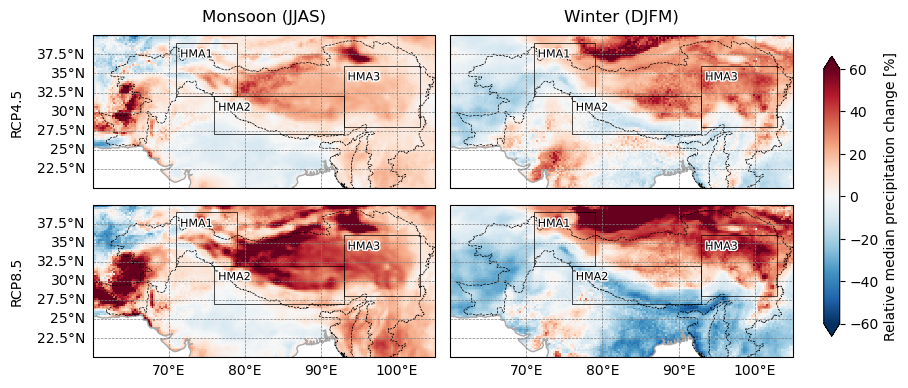

In [129]:
# Plot
fig, ax = plt.subplots(2, 2, figsize=(8, 4), subplot_kw={"projection": proj}, layout='tight')

fig1  = rcp45_ff_median.isel(t=1).plot(x="lon", y="lat", ax=ax[0, 0], vmin=-60, center=0, cmap='RdBu_r',
                                           add_colorbar=False, linewidth=0, zorder=-10)
ax[0, 0].set_title("Monsoon (JJAS)", pad=10)
ax[0, 0].set_ylabel("RCP4.5")

fig2  = rcp45_ff_median.isel(t=2).plot(x="lon", y="lat", ax=ax[0, 1], vmin=-60, center=0, cmap='RdBu_r',
                                           add_colorbar=False, linewidth=0, zorder=-10)
ax[0,1].set_title("Winter (DJFM)", pad=10)
cax = plt.axes([1.02, 0.15, 0.02, 0.7])
plt.colorbar(fig2, cax=cax, label='Relative median precipitation change [%]', extend='both')


fig3  = rcp85_ff_median.isel(t=1).plot(x="lon", y="lat", ax=ax[1, 0], vmin=-60, center=0, cmap='RdBu_r',
                                           add_colorbar=False, linewidth=0, zorder=-10)
ax[1, 0].set_title(" ")
ax[1, 0].set_ylabel("RCP8.5")

fig4  = rcp85_ff_median.isel(t=2).plot(x="lon", y="lat", ax=ax[1, 1], vmin=-60, center=0, cmap='RdBu_r',
                                           add_colorbar=False, linewidth=0, zorder=-10)
ax[1, 1].set_title(" ")

for i in range(4):
    gl = ax[i//2, i%2].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    if i % 2 != 0:
       gl.left_labels = False
    if i // 2 != 1:
        gl.bottom_labels = False
    ax[i//2, i%2].add_feature(ocean_50m, zorder=-9)
    for region, coord in region_dict2.items():
        ax[i//2, i%2].text(coord[0], coord[1], region, fontsize=8, color='black', ha='left', va='center', zorder=10, 
                path_effects=[pe.withStroke(linewidth=2, foreground="white")]) 
    ax[i//2, i%2].add_geometries([hma1, hma2, hma3], proj, edgecolor="black",
                facecolor="None", linestyle='-', linewidth=0.5)
    # HKH boundaries
    for rec in hkh_region_shape.records():
        ax[i//2, i%2].add_geometries(
        [rec.geometry],
        hkh_region,
        edgecolor="black",
        facecolor="None",
        linestyle='--',
        linewidth=0.5,
        zorder=-8)

ax[0, 0].text(left-0.45, 0.5*(bottom+top), "RCP4.5",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[0,0].transAxes)

ax[1, 0].text(left-0.45, 0.5*(bottom+top), "RCP8.5",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[1,0].transAxes)

plt.subplots_adjust(hspace=-0.4)

# Rasterize negative zorder
for a in ax.flat:
    a.set_rasterization_zorder(0) 

plt.savefig("far_future_preds_median.pdf", dpi=300, bbox_inches='tight')

In [83]:
hma1_rcp85_ff_median= rcp85_ff_median.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.mean(hma1_rcp85_ff_median.isel(t=1).values)))
print('HMA1 Win {:.0f}%'.format(np.mean(hma1_rcp85_ff_median.isel(t=2).values)))

hma2_rcp85_ff_median= rcp85_ff_median.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.mean(hma2_rcp85_ff_median.isel(t=1).values)))
print('HMA2 Win {:.0f}%'.format(np.mean(hma2_rcp85_ff_median.isel(t=2).values)))

hma3_rcp85_ff_median= rcp85_ff_median.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.mean(hma3_rcp85_ff_median.isel(t=1).values)))
print('HMA3 Win {:.0f}%'.format(np.mean(hma3_rcp85_ff_median.isel(t=2).values)))

HMA1 Mon 15%
HMA1 Win 15%
HMA2 Mon 23%
HMA2 Win -7%
HMA3 Mon 26%
HMA3 Win 27%


### Percentile changes

In [46]:
rcp85_ff_ds['p95_change'] =  (rcp85_ff_ds['moe_p95'] /hist_ds['moe_p95'] - 1) * 100
rcp85_ff_p95 = aplot.seasonal_means(rcp85_ff_ds.p95_change, 'p95_change')

rcp85_ff_ds['p5_change'] =  (rcp85_ff_ds['moe_p5'] /hist_ds['moe_p5'] - 1) * 100
rcp85_ff_p5 = aplot.seasonal_means(rcp85_ff_ds.p5_change, 'p5_change')

In [47]:
rcp85_ff_ds['ew_median_change'] =  (rcp85_ff_ds['ew_median'] /hist_ds['ew_median'] - 1) * 100
rcp85_ff_ew_median = aplot.seasonal_means(rcp85_ff_ds.ew_median_change, 'ew_median_change')

rcp85_ff_ds['ew_p95_change'] =  (rcp85_ff_ds['ew_p95'] /hist_ds['ew_p95'] - 1) * 100
rcp85_ff_ew_p95 = aplot.seasonal_means(rcp85_ff_ds.ew_p95_change, 'ew_p95_change')

rcp85_ff_ds['ew_p5_change'] =  (rcp85_ff_ds['ew_p5'] /hist_ds['ew_p5'] - 1) * 100
rcp85_ff_ew_p5 = aplot.seasonal_means(rcp85_ff_ds.ew_p5_change, 'ew_p5_change')

In [48]:
rcp85_diff_median  = rcp85_ff_median - rcp85_ff_ew_median
rcp85_diff_p95  = rcp85_ff_p95 - rcp85_ff_ew_p95
rcp85_diff_p5  = rcp85_ff_p5 - rcp85_ff_ew_p5

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_49767/4164288748.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("far_future_preds_diffs.pdf", dpi=300, bbox_inches='tight')


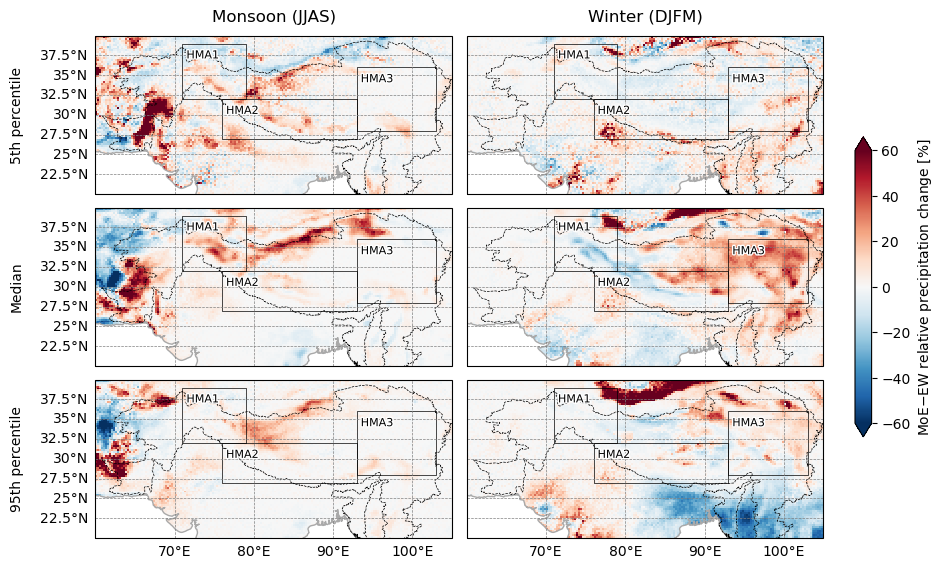

In [ ]:
# Plot
fig, ax = plt.subplots(3, 2, figsize=(8.3, 6), subplot_kw={"projection": proj}, layout='tight')

fig1  = rcp85_diff_p5.isel(t=1).plot(x="lon", y="lat", ax=ax[0, 0], vmin=-60, center=0, cmap='RdBu_r',
                                     add_colorbar=False,linewidth=0, zorder=-10)
ax[0, 0].set_title("Monsoon (JJAS)", pad=10)
ax[0, 0].set_ylabel("RCP4.5")

fig2  =  rcp85_diff_p5.isel(t=2).plot(x="lon", y="lat", ax=ax[0, 1],  vmin=-60, center=0, cmap='RdBu_r',
                                       add_colorbar=False,linewidth=0, zorder=-10)
ax[0,1].set_title("Winter (DJFM)", pad=10)
cax = plt.axes([1.02, 0.25, 0.02, 0.5])
plt.colorbar(fig2, cax=cax, label='MoE$-$EW relative precipitation change [%]', extend='both')

fig3  = rcp85_diff_median.isel(t=1).plot(x="lon", y="lat", ax=ax[1, 0], center=0, vmin=-60, cmap='RdBu_r', 
                                         add_colorbar=False,linewidth=0, zorder=-10)
ax[1, 0].set_title(" ")

fig4  = rcp85_diff_median.isel(t=2).plot(x="lon", y="lat", ax=ax[1, 1], center=0, vmin=-60, cmap='RdBu_r', 
                                         add_colorbar=False, linewidth=0, zorder=-10)
ax[1, 1].set_title(" ")

fig5  = rcp85_diff_p95.isel(t=1).plot(x="lon", y="lat", ax=ax[2, 0], center=0, vmin=-60, cmap='RdBu_r', 
                                      add_colorbar=False, linewidth=0, zorder=-10)
ax[2, 0].set_title(" ")

fig5  = rcp85_diff_p95.isel(t=2).plot(x="lon", y="lat", ax=ax[2, 1], center=0, vmin=-60, cmap='RdBu_r', 
                                      add_colorbar=False, linewidth=0, zorder=-10)
ax[2, 1].set_title(" ")

for i in range(6):
    gl = ax[i//2, i%2].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    if i % 2 != 0:
       gl.left_labels = False
    if i // 2 != 2:
        gl.bottom_labels = False
    ax[i//2, i%2].add_feature(ocean_50m, zorder=-9)

    for region, coord in region_dict2.items():
        ax[i//2, i%2].text(coord[0], coord[1], region, fontsize=8, color='black', ha='left', va='center', zorder=10, 
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])
    ax[i//2, i%2].add_geometries([hma1, hma2, hma3], proj, edgecolor="black",
                facecolor="None", linestyle='-', linewidth=0.5)
            # HKH boundaries
    for rec in hkh_region_shape.records():
        ax[i//2, i%2].add_geometries(
                [rec.geometry],
                hkh_region,
                edgecolor="black",
                facecolor="None",
                linestyle='--',
                linewidth=0.5,
                zorder=-8)

ax[0, 0].text(left-0.45, 0.5*(bottom+top), "5th percentile",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[0,0].transAxes)

ax[1, 0].text(left-0.45, 0.5*(bottom+top), "Median",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[1,0].transAxes)

ax[2, 0].text(left-0.45, 0.5*(bottom+top), "95th percentile",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[2,0].transAxes)

plt.subplots_adjust(hspace=-0.45)


# Rasterize negative zorder
for a in ax.flat:
    a.set_rasterization_zorder(0)

plt.savefig("far_future_preds_diffs.pdf", dpi=300, bbox_inches='tight')

In [87]:
hma1_rcp85_diff_p5= rcp85_diff_p5.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.mean(np.abs(hma1_rcp85_diff_p5.isel(t=1).values))))
print('HMA1 Win {:.0f}%'.format(np.mean(np.abs(hma1_rcp85_diff_p5.isel(t=2).values))))

hma2_rcp85_diff_p5= rcp85_diff_p5.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.mean(np.abs(hma2_rcp85_diff_p5.isel(t=1).values))))
print('HMA2 Win {:.0f}%'.format(np.mean(np.abs(hma2_rcp85_diff_p5.isel(t=2).values))))

hma3_rcp85_diff_p5= rcp85_diff_p5.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.mean(np.abs(hma3_rcp85_diff_p5.isel(t=1).values))))
print('HMA3 Win {:.0f}%'.format(np.mean(np.abs(hma3_rcp85_diff_p5.isel(t=2).values))))

HMA1 Mon 7%
HMA1 Win 5%
HMA2 Mon 6%
HMA2 Win 6%
HMA3 Mon 2%
HMA3 Win 6%


In [124]:
hma1_rcp85_diff_median= rcp85_diff_median.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.max(hma1_rcp85_diff_median.isel(t=1).values)))
print('HMA1 Win {:.0f}%'.format(np.max(hma1_rcp85_diff_median.isel(t=2).values)))

hma2_rcp85_diff_median= rcp85_diff_median.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.max(hma2_rcp85_diff_median.isel(t=1).values)))
print('HMA2 Win {:.0f}%'.format(np.max(hma2_rcp85_diff_median.isel(t=2).values)))

hma3_rcp85_diff_median= rcp85_diff_median.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.max(hma3_rcp85_diff_median.isel(t=1).values)))
print('HMA3 Win {:.0f}%'.format(np.max(hma3_rcp85_diff_median.isel(t=2).values)))

HMA1 Mon 54%
HMA1 Win 96%
HMA2 Mon 22%
HMA2 Win 51%
HMA3 Mon 15%
HMA3 Win 62%


In [123]:
hma1_rcp85_diff_median= rcp85_diff_median.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.min(hma1_rcp85_diff_median.isel(t=1).values)))
print('HMA1 Win {:.0f}%'.format(np.min(hma1_rcp85_diff_median.isel(t=2).values)))

hma2_rcp85_diff_median= rcp85_diff_median.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.min(hma2_rcp85_diff_median.isel(t=1).values)))
print('HMA2 Win {:.0f}%'.format(np.min(hma2_rcp85_diff_median.isel(t=2).values)))

hma3_rcp85_diff_median= rcp85_diff_median.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.min(hma3_rcp85_diff_median.isel(t=1).values)))
print('HMA3 Win {:.0f}%'.format(np.min(hma3_rcp85_diff_median.isel(t=2).values)))

HMA1 Mon -15%
HMA1 Win -31%
HMA2 Mon -11%
HMA2 Win -27%
HMA3 Mon -10%
HMA3 Win -10%


In [125]:
hma1_rcp85_diff_median= rcp85_diff_median.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.max(hma1_rcp85_diff_p95.isel(t=1).values)))
print('HMA1 Win {:.0f}%'.format(np.max(hma1_rcp85_diff_p95.isel(t=2).values)))

hma2_rcp85_diff_p95= rcp85_diff_p95.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.max(hma2_rcp85_diff_p95.isel(t=1).values)))
print('HMA2 Win {:.0f}%'.format(np.max(hma2_rcp85_diff_p95.isel(t=2).values)))

hma3_rcp85_diff_p95= rcp85_diff_p95.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.max(hma3_rcp85_diff_p95.isel(t=1).values)))
print('HMA3 Win {:.0f}%'.format(np.max(hma3_rcp85_diff_p95.isel(t=2).values)))

HMA1 Mon 32%
HMA1 Win 92%
HMA2 Mon 33%
HMA2 Win 42%
HMA3 Mon 15%
HMA3 Win 36%


In [89]:
hma1_rcp85_diff_p95= rcp85_diff_p95.sel(lon=slice(71, 79), lat=slice(32, 39))
print('HMA1 Mon {:.0f}%'.format(np.mean(np.abs(hma1_rcp85_diff_p95.isel(t=1).values))))
print('HMA1 Win {:.0f}%'.format(np.mean(np.abs(hma1_rcp85_diff_p95.isel(t=2).values))))

hma2_rcp85_diff_p95= rcp85_diff_p95.sel(lon=slice(76, 93), lat=slice(27, 32))
print('HMA2 Mon {:.0f}%'.format(np.mean(np.abs(hma2_rcp85_diff_p95.isel(t=1).values))))
print('HMA2 Win {:.0f}%'.format(np.mean(np.abs(hma2_rcp85_diff_p95.isel(t=2).values))))

hma3_rcp85_diff_p95= rcp85_diff_p95.sel(lon=slice(93, 103), lat=slice(28, 36))
print('HMA3 Mon {:.0f}%'.format(np.mean(np.abs(hma3_rcp85_diff_p95.isel(t=1).values))))
print('HMA3 Win {:.0f}%'.format(np.mean(np.abs(hma3_rcp85_diff_p95.isel(t=2).values))))

HMA1 Mon 4%
HMA1 Win 5%
HMA2 Mon 2%
HMA2 Win 4%
HMA3 Mon 1%
HMA3 Win 6%


## Near future predictions

### Median change

In [58]:
rcp45_nf_df = pd.read_csv("../../data/moe_outputs/moe_alpha_rcp45_2036_2065_ref_1951_2005.csv", index_col=0)
rcp85_nf_df = pd.read_csv("../../data/moe_outputs/moe_alpha_rcp85_2036_2065_ref_1951_2005.csv", index_col=0)

In [59]:
rcp85_nf_ds = rcp85_nf_df.set_index(['month', 'lat', 'lon']).to_xarray()
rcp85_nf_ds['median_change'] =  (rcp85_nf_ds['moe_median'] /hist_ds['moe_median'] - 1) * 100
rcp85_nf_median = aplot.seasonal_means(rcp85_nf_ds.median_change, 'median_change')

rcp45_nf_ds = rcp45_nf_df.set_index(['month', 'lat', 'lon']).to_xarray()
rcp45_nf_ds['median_change'] =  (rcp45_nf_ds['moe_median']/ hist_ds['moe_median']- 1) * 100
rcp45_nf_median = aplot.seasonal_means(rcp45_nf_ds.median_change, 'median_change')

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_49767/2256868983.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("near_future_preds_median.pdf", dpi=300, bbox_inches='tight')


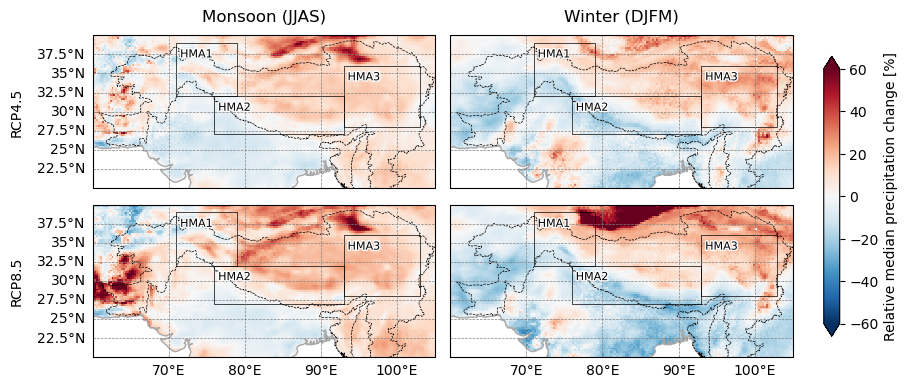

In [134]:
# Plot
fig, ax = plt.subplots(2, 2, figsize=(8, 4), subplot_kw={"projection": proj}, layout='tight')

fig1  = rcp45_nf_median.isel(t=1).plot(x="lon", y="lat", ax=ax[0, 0], vmin=-60, center=0, cmap='RdBu_r',
                                           add_colorbar=False, linewidth=0, zorder=-10)
ax[0, 0].set_title("Monsoon (JJAS)", pad=10)
ax[0, 0].set_ylabel("RCP4.5")

fig2  = rcp45_nf_median.isel(t=2).plot(x="lon", y="lat", ax=ax[0, 1], vmin=-60, center=0, cmap='RdBu_r',
                                           add_colorbar=False, linewidth=0, zorder=-10)
ax[0,1].set_title("Winter (DJFM)", pad=10)
cax = plt.axes([1.02, 0.15, 0.02, 0.7])
plt.colorbar(fig2, cax=cax, label='Relative median precipitation change [%]', extend='both')


fig3  = rcp85_nf_median.isel(t=1).plot(x="lon", y="lat", ax=ax[1, 0], vmin=-60, center=0, cmap='RdBu_r',
                                           add_colorbar=False, linewidth=0, zorder=-10)
ax[1, 0].set_title(" ")
ax[1, 0].set_ylabel("RCP8.5")

fig4  = rcp85_nf_median.isel(t=2).plot(x="lon", y="lat", ax=ax[1, 1], vmin=-60, center=0, cmap='RdBu_r',
                                           add_colorbar=False, linewidth=0, zorder=-10)
ax[1, 1].set_title(" ")

for i in range(4):
    gl = ax[i//2, i%2].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    if i % 2 != 0:
       gl.left_labels = False
    if i // 2 != 1:
        gl.bottom_labels = False
    ax[i//2, i%2].add_feature(ocean_50m, zorder=-9)
    for region, coord in region_dict2.items():
        ax[i//2, i%2].text(coord[0], coord[1], region, fontsize=8, color='black', ha='left', va='center', zorder=10, 
                path_effects=[pe.withStroke(linewidth=2, foreground="white")]) 
    ax[i//2, i%2].add_geometries([hma1, hma2, hma3], proj, edgecolor="black",
                facecolor="None", linestyle='-', linewidth=0.5)
    # HKH boundaries
    for rec in hkh_region_shape.records():
        ax[i//2, i%2].add_geometries(
        [rec.geometry],
        hkh_region,
        edgecolor="black",
        facecolor="None",
        linestyle='--',
        linewidth=0.5,
        zorder=-8)

ax[0, 0].text(left-0.45, 0.5*(bottom+top), "RCP4.5",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[0,0].transAxes)

ax[1, 0].text(left-0.45, 0.5*(bottom+top), "RCP8.5",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[1,0].transAxes)

plt.subplots_adjust(hspace=-0.4)


# Rasterize negative zorder
for a in ax.flat:
    a.set_rasterization_zorder(0)

plt.savefig("near_future_preds_median.pdf", dpi=300, bbox_inches='tight')

### Percentile changes

In [61]:
rcp85_nf_ds['p95_change'] =  (rcp85_nf_ds['moe_p95'] /hist_ds['moe_p95'] - 1) * 100
rcp85_nf_p95 = aplot.seasonal_means(rcp85_nf_ds.p95_change, 'p95_change')

rcp85_nf_ds['p5_change'] =  (rcp85_nf_ds['moe_p5'] /hist_ds['moe_p5'] - 1) * 100
rcp85_nf_p5 = aplot.seasonal_means(rcp85_nf_ds.p5_change, 'p5_change')

In [62]:
rcp85_nf_ds['ew_median_change'] =  (rcp85_nf_ds['ew_median'] /hist_ds['ew_median'] - 1) * 100
rcp85_nf_ew_median = aplot.seasonal_means(rcp85_nf_ds.ew_median_change, 'ew_median_change')

rcp85_nf_ds['ew_p95_change'] =  (rcp85_nf_ds['ew_p95'] /hist_ds['ew_p95'] - 1) * 100
rcp85_nf_ew_p95 = aplot.seasonal_means(rcp85_nf_ds.ew_p95_change, 'ew_p95_change')

rcp85_nf_ds['ew_p5_change'] =  (rcp85_nf_ds['ew_p5'] /hist_ds['ew_p5'] - 1) * 100
rcp85_nf_ew_p5 = aplot.seasonal_means(rcp85_nf_ds.ew_p5_change, 'ew_p5_change')

In [63]:
rcp85_dinf_median  = rcp85_nf_median - rcp85_nf_ew_median
rcp85_dinf_p95  = rcp85_nf_p95 - rcp85_nf_ew_p95
rcp85_dinf_p5  = rcp85_nf_p5 - rcp85_nf_ew_p5

/var/folders/jn/8my89c2536z23fm0t2l486340000gn/T/ipykernel_49767/2448435821.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig("near_future_preds_dinfs.pdf", dpi=300, bbox_inches='tight')


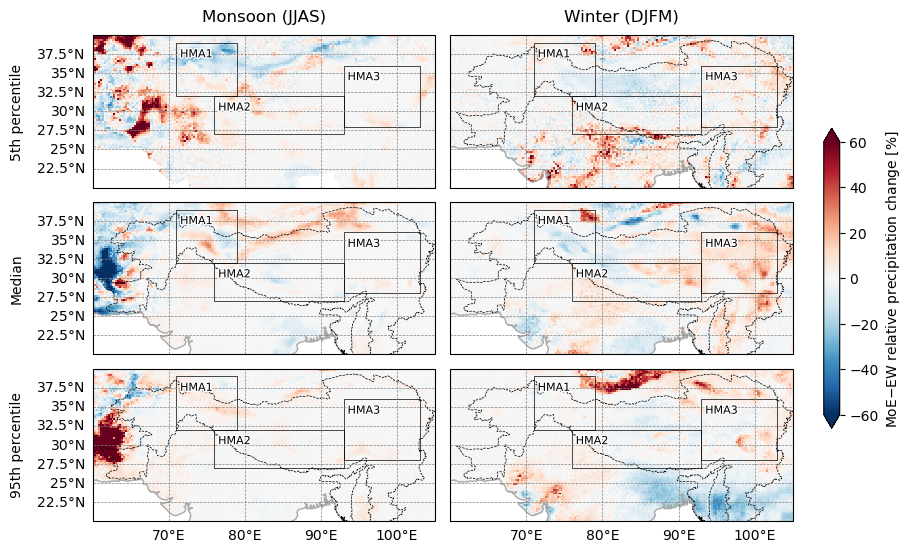

In [137]:
# Plot
fig, ax = plt.subplots(3, 2, figsize=(8, 6), subplot_kw={"projection": proj}, layout='tight')

fig1  = rcp85_dinf_p5.isel(t=1).plot(x="lon", y="lat", ax=ax[0, 0], vmin=-60, center=0, cmap='RdBu_r',
                                     add_colorbar=False,linewidth=0, rasterized=True)
ax[0, 0].set_title("Monsoon (JJAS)", pad=10)
ax[0, 0].set_ylabel("RCP4.5")

fig2  =  rcp85_dinf_p5.isel(t=2).plot(x="lon", y="lat", ax=ax[0, 1],  vmin=-60, center=0, cmap='RdBu_r',
                                       add_colorbar=False,linewidth=0, zorder=-10)
ax[0,1].set_title("Winter (DJFM)", pad=10)
cax = plt.axes([1.02, 0.25, 0.02, 0.5])
plt.colorbar(fig2, cax=cax, label='MoE$-$EW relative precipitation change [%]', extend='both')

fig3  = rcp85_dinf_median.isel(t=1).plot(x="lon", y="lat", ax=ax[1, 0], center=0, vmin=-60, cmap='RdBu_r', 
                                         add_colorbar=False,linewidth=0, zorder=-10)
ax[1, 0].set_title(" ")

fig4  = rcp85_dinf_median.isel(t=2).plot(x="lon", y="lat", ax=ax[1, 1], center=0, vmin=-60, cmap='RdBu_r', 
                                         add_colorbar=False, linewidth=0, zorder=-10)
ax[1, 1].set_title(" ")

fig5  = rcp85_dinf_p95.isel(t=1).plot(x="lon", y="lat", ax=ax[2, 0], center=0, vmin=-60, cmap='RdBu_r', 
                                      add_colorbar=False, linewidth=0, zorder=-10)
ax[2, 0].set_title(" ")

fig5  = rcp85_dinf_p95.isel(t=2).plot(x="lon", y="lat", ax=ax[2, 1], center=0, vmin=-60, cmap='RdBu_r', 
                                      add_colorbar=False, linewidth=0, zorder=-10)
ax[2, 1].set_title(" ")

for i in range(6):
    gl = ax[i//2, i%2].gridlines(draw_labels=True, linewidth=0.5, linestyle='--', color='gray')
    gl.top_labels = False
    gl.right_labels = False
    if i % 2 != 0:
       gl.left_labels = False
    if i // 2 != 2:
        gl.bottom_labels = False
    ax[i//2, i%2].add_feature(ocean_50m, zorder=-9)

    for region, coord in region_dict2.items():
        ax[i//2, i%2].text(coord[0], coord[1], region, fontsize=8, color='black', ha='left', va='center', zorder=10, 
                path_effects=[pe.withStroke(linewidth=2, foreground="white")])
    ax[i//2, i%2].add_geometries([hma1, hma2, hma3], proj, edgecolor="black",
                facecolor="None", linestyle='-', linewidth=0.5)
            # HKH boundaries
    for rec in hkh_region_shape.records():
        ax[i//2, i%2].add_geometries(
                [rec.geometry],
                hkh_region,
                edgecolor="black",
                facecolor="None",
                linestyle='--',
                linewidth=0.5,
                zorder=-8)

ax[0, 0].text(left-0.45, 0.5*(bottom+top), "5th percentile",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[0,0].transAxes)

ax[1, 0].text(left-0.45, 0.5*(bottom+top), "Median",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[1,0].transAxes)

ax[2, 0].text(left-0.45, 0.5*(bottom+top), "95th percentile",
        horizontalalignment='right',
        verticalalignment='center',
        rotation='vertical',
        transform=ax[2,0].transAxes)

plt.subplots_adjust(hspace=-0.5)


# Rasterize negative zorder
for a in ax.flat:
    a.set_rasterization_zorder(0)

plt.savefig("near_future_preds_dinfs.pdf", dpi=300, bbox_inches='tight')

## KDE plots

For Tirich Mir  - 36.25417°N 71.84333°E

In [17]:
import sys
sys.path.append('/Users/kenzatazi/Documents/CDT/Code/')
from load import aphrodite
import seaborn as sns

In [18]:
aphro_ds = aphrodite.collect_APHRO('hma', minyear='1951', maxyear='2005')
aphro_loc = aphro_ds.sel(lat=29.125, lon=90.875, method='nearest')
aphro_df = aphro_loc.to_dataframe().reset_index()
aphro_df['month']= aphro_df.time.dt.month.astype(int)

In [ ]:
aphro_df

In [20]:
ew_arr = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/moe_outputs/_historical_1976_2005_ref_1951_2005_equal.npy')
moe_arr = np.load('/Users/kenzatazi/Documents/CDT/Code/bcm4rcm/data/moe_outputs/_historical_1976_2005_ref_1951_2005_inv_wasserstein.npy')

In [21]:
df1 = pd.DataFrame({'x': moe_arr.flatten(), 'moe': np.ones(120000), 'month': np.repeat(np.arange(12), 10000)})
df2 = pd.DataFrame({'x': ew_arr.flatten(), 'moe': np.zeros(120000), 'month': np.repeat(np.arange(12), 10000)})

In [22]:
df = pd.concat([df1, df2]).reset_index()[['x', 'month', 'moe']]

In [ ]:
df

In [ ]:
fig, ax = plt.subplots(12, 1, figsize=(10, 15), sharex=True)

fig.subplots_adjust(hspace=0.5)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in range(12):
    sns.kdeplot(df1[df1.month==i].x, ax=ax[i], color='blue', label='MoE', alpha=0.5, clip=[0,10]) #/np.sum(ew_pdf[i,:150]*150)
    sns.kdeplot(df2[df2.month==i].x, ax=ax[i], color='orange', label='EW', alpha=0.5, clip=[0,10]) #/np.sum(ew_pdf[i,:150]*150)
    sns.kdeplot(aphro_df[aphro_df.month==i+1].tp, ax=ax[i], color='black', label='APHRODITE', alpha=0.5, clip=[0,10])
    ax[i].set_xlim(-0.1, 8)
    ax[i].set_ylim(-0.1)
    ax[i].set_title(months[i], loc='right')
    ax[i].set_xticks([0, 0.5, 1, 2, 4, 6, 8])
    ax[i].set_xticklabels('')
    ax[i].grid()
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].plot([-0.5, 10], [0,0], color='black', linestyle='-', linewidth=0.5)
    if i == 11:
        ax[i].set_xticklabels([0, 0.5, 1, 2, 4, 6, 8])
        ax[i].set_xlabel('Precipitation [mm d$^{-1}$]')
    ax[i].xaxis.set_ticks_position('none') 
    ax[i].yaxis.set_ticks_position('none') 
    ax[i].patch.set_visible(False)

plt.legend(framealpha=0.8, edgecolor='white')
plt.savefig("kde_dist_historical.pdf", bbox_inches='tight')

In [ ]:
plt.figure(figsize=(15, 6))
sns.violinplot(df, x='month', y='x', hue='moe', split=True, density_norm='area', width=3, inner='quart', bw_adjust=0.5)